# Roughly how far will H diffuse in an olivine block?

Examples based on [Demouchy et al. 2016 experiments at 3 GPa](http://www.sciencedirect.com/science/article/pii/S0031920116301741)

Elizabeth Ferriss, Nov 29, 2016

## Coding intro
What you're reading here is a [jupyter notebook](http://jupyter.org/), which is a tool for combining text and working code.

Any section in this document with 'In [any number]:' to the left is python code. Don't worry that the numbers aren't in order.

The guts of the code used to make the figures and calculations below is written in a series of text documents called modules, most of which are grouped together into a package called [pynams](https://github.com/EFerriss/pynams).

The pynams modules used in this example are
* pynams - handles basic things like the dimensions of samples
* diffusion - for modeling diffusion in 1D and 3D
* diffusivity_library - a library of previous diffusivity measurements and ways to handle them

So let's import some modules.

In [161]:
from pynams import pynams, diffusion
from pynams import diffusivity_library as dlib # short name for less typing
import numpy as np # for some math

Let me know if you try getting pynams installed on your computer and have trouble. I recommend 
* if you don't have python at all, go get [Anaconda](https://www.continuum.io/downloads)
* use [github desktop](https://desktop.github.com/) to get pynams onto your computer
* go to the main pynams directory in the command line and type 'python setup.py install' without the quotes
* open up a jupyter notebook or a new document in [spyder](https://pythonhosted.org/spyder/), both of which come with Anaconda

**You should not have to copy/paste or pay for anything**

This next line makes my plots show up correctly in the jupyter notebook.

In [162]:
%matplotlib inline 

## Samples


Here are the samples and dimensions (in microns) of the 6 olivine blocks in Table 1 of Demouchy et al. 2016. twoA, twoB, and twoC refer to the lengths of the dimensions parallel to [100], [010], and [001]. I use [bracketed lists] so I can accommodate multiple thickness measurements.

In [163]:
SD1 = pynams.Sample(twoA_list=[1060.], twoB_list=[2060.], twoC_list=[1740.])
SD2 = pynams.Sample(twoA_list=[1600.], twoB_list=[2080.], twoC_list=[1770.])
SD3 = pynams.Sample(twoA_list=[1600.], twoB_list=[2020.], twoC_list=[1730.])
SD5 = pynams.Sample(twoA_list=[1010.], twoB_list=[1090.], twoC_list=[2090.])
SD6 = pynams.Sample(twoA_list=[1040.], twoB_list=[1180.], twoC_list=[2040.])
SD7 = pynams.Sample(twoA_list=[1710.], twoB_list=[2040.], twoC_list=[1040.])

I will never have to type or look up those numbers in here again. If I want them, I just ask for them. The [0] in this example tells it to grab the first value, not the full list.

In [164]:
volumeSD2 = SD2.twoA_list[0] * SD2.twoB_list[0] * SD3.twoC_list[0]
print 'The volume of sample block SD2 is', volumeSD2 / (1e9), 'mm^3'

The volume of sample block SD2 is 5.75744 mm^3


## fast_vs_slow() bulk H diffusion mechanisms

The function fast_vs_slow in the diffusivity_library module (dlib) provides a quick general idea of the simultaneous progress of both the proton-polaron (PP) and proton-vacancy (PV) bulk H diffusion mechanisms in olivine. It assumes no interaction at all between the two mechanisms, which is maybe wrong (Thoraval & Demouchy 2014), but it's fast and gives a nice general idea about what's happening. 

The resulting plot also uses the same normalized scale for both mechanisms, but note the final area for PV will be much higher than that for PP. If you're confused about the PP and PV mechanisms, my first paper recommendation is [Demouchy & Mackwell 2006](http://link.springer.com/article/10.1007/s00269-006-0081-2).

The function fast_vs_slow requires the temperature in celsius, the sample (which includes all 3 dimensions, as above) and the time in minutes.  

It returns the figure, which is what you can resize and/or save, and the 3 axes of the different subplots, which is what you use if you want to plot more stuff.

Here's the first sample from Demouchy et al.'s table:

### SD1 at 1093 C

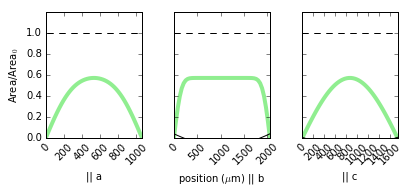

In [165]:
figure, axes = dlib.fast_vs_slow(celsius=1093., sample=SD1, minutes=60.*5, printout=False)

The green line is the slower PV mechanism.  

All of these profiles are non-path-integrated, meaning this is what you would expect to see if you could cut the sample open and take a perfect set of measurements through the center exactly parallel to each axis.

If you want to see when the PP mechanism saturates, shorten the time.  

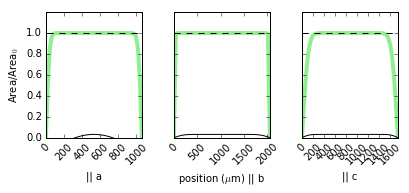

In [166]:
figure, axes = dlib.fast_vs_slow(celsius=1093., sample=SD1, minutes=5., printout=False)

Hydration looks the same just flipped vertically. Note that this is just to compare relative progress. In real olivine, the PP mechanism (thin black lines) saturates at some lower-than-true-solubility, and as a result the PV mechanism profiles (thick green) are squished upward in hydration profiles. 

## Calculating the diffusivities

### fast_vs_slow(printout=True)

In the next example for Demouchy et al's 2nd sample, I have it print out the actual diffusitivies in order || a, || b, and || c. This option, printout=True, is the default.


### SD2 at 905 C (Fig. 9)

slower proton-vacancy pv mechanism diffusivities
log10 D at  905.0 C:  -13.9  in m2/s
log10 D at  905.0 C:  -14.1  in m2/s
log10 D at  905.0 C:  -12.8  in m2/s

faster proton-polaron pp mechanism diffusivites
log10 D at  905.0 C:  -10.1  in m2/s
log10 D at  905.0 C:  -11.5  in m2/s
log10 D at  905.0 C:  -11.4  in m2/s


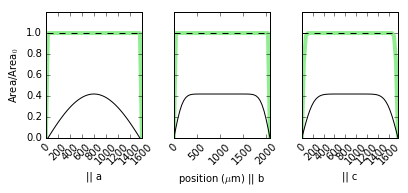

In [167]:
figure, axes = dlib.fast_vs_slow(celsius=905., sample=SD2, minutes=60., printout=True)

The results shown in Fig. 9 look somewhere in between these two. We'll come back to that.

### whatIsD()
If you just want the diffusivities, find the appropriate Diffusivity object (where the activation energies, etc. are stored; use tab complete after dlib to see options) and then use the function whatIsD() with the temperature in celsius as input.

The output is an array of log10 of the diffusivities || [100], || [010], || [001], and unoriented in m2/s.

Here's an example for the fast proton-polaron mechanism from Kohlstedt & Mackwell 1998:

In [168]:
dlib.KM98_fast.whatIsD(celsius=900.)

[-10.131632934635144, -11.552727607249828, -11.449814459014474, None]

Compare that with the result for Padron-Navarta et al. 2014's site-specific H diffusion results for the Si-vacancy-related [Si] mechanism:

In [169]:
dlib.pnav_Si.whatIsD(celsius=900.)

[None, None, None, -17.300818270360359]

The Kohlstedt & Mackwell 1998 PP mechanism (KM98_fast) has 3 diffusivities in 3 directions, whereas Padron-Navarta et al. did not use oriented samples. You can store the output array in a variable and then call the numbers up later (start with 0 for the first one).  

Here I'm calculating and then printing out only the final value (index 3) for Padron-Navarta et al.'s site-specific Mg-vacancy-related [Mg] H diffusion mechanism:

In [170]:
D = dlib.pnav_Mg.whatIsD(celsius=900.)
print D[3]

-13.5058530772


And for the slower PV mechanism diffusivities used to calculate the think green lines in all of these fast_vs_slow plots:

In [171]:
D = dlib.KM98_slow.whatIsD(celsius=900.)
print D[0:3]

[-13.996778169870476, -14.172291818084735, -12.887544170426397]


## Great. Back to Demouchy et al. 2016

### SD6 at 900C (Figs. 4 and 7)

The other Demouchy et al. sample at 900C I would expect has progressed a little bit further then SD2 but not much. Demouchy et al. see more movement than would be expect based on the lower pressure experiments used to calculate these curves.  

Here's the prediction for the experiment

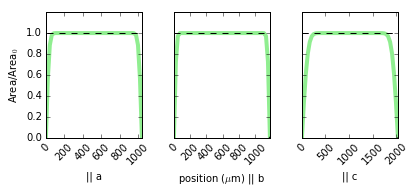

In [172]:
figure, axes = dlib.fast_vs_slow(celsius=900., sample=SD6, minutes=60.*10., printout=False) 

Now I'm changing the time to 1 hr, roughly when the PP mechanism likely saturated

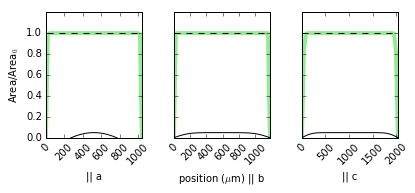

In [173]:
figure, axes = dlib.fast_vs_slow(celsius=900., sample=SD6, minutes=60.*1., printout=False) 

### SD3 (Fig. 8) and SD5 at 1200 C
fast_vs_slow() predicts that both Demouchy et al. samples at 1200C should be fully saturated, and indeed they were in the experiments.  

Note: Sometimes the error function that I'm using to calculate the diffusion profiles does crazy things at the end. The upward curvature and weird flat profiles are bugs in my code, not real profiles, and should be interpreted as the system having reaching equilibrium.

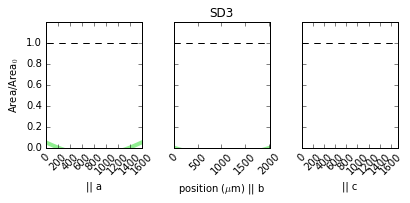

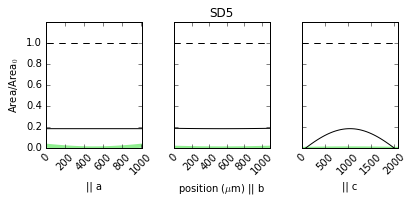

In [174]:
figure, axesSD3 = dlib.fast_vs_slow(celsius=1200., sample=SD3, minutes=60.*10., printout=False)
figure, axesSD5 = dlib.fast_vs_slow(celsius=1200., sample=SD5, minutes=60.*5., printout=False)
title = axesSD3[1].set_title('SD3')
title = axesSD5[1].set_title('SD5')

### SD7 1000C

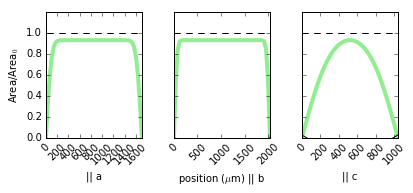

In [175]:
figure, axes = dlib.fast_vs_slow(celsius=1000., sample=SD7, minutes=60.*5., printout=False)

They don't show the final measured profiles for SD7, only the diffusivities reported in Table 4 based on the profile || [100] and assuming diffusion is isotropic, so let's plot those up.

## Plotting diffusion profiles with diffusion3Dnpi()

The 'npi' at the end of 'diffusion3Dnpi'stands for 'non-path-integrated', meaning we're assuming there aren't any whole-block effects with the absorbance signal getting integrated. By default, this function plots the diffusion profiles you would see if you cut the sample and returns, in order:
* the figure handle, as above
* a list of the 3 axes, one for each subplot
* v, a 3-D matrix containing the concentrations distributed throughout the entire block
* all of the x-axis data used to make the plot
* all of the y-axis data in the plot

In [176]:
# Here I set up the variables that will go into the function
sample = SD7 # If I decide to do the same thing with another sample, I only have to change one thing
a = sample.twoA_list[0]
b = sample.twoB_list[0]
c = sample.twoC_list[0]
time_seconds = 5. * 3600.

reported_diffusivities_in_each_direction_in_m2s = [2e-12, 2e-12, 2e-12]
# I imported numpy at the beginning so I could do this next step
# It's good practice to keep all imports at the top so a new person can see everything needed
log10D = np.log10(reported_diffusivities_in_each_direction_in_m2s)

print 'The reported log10 diffusivities in m2/s are', log10D
print 'The expected log10 PV diffusivities in m2/s are', dlib.KM98_slow.whatIsD(celsius=1000,)[0:3]
print 'The expected log10 PP diffusivities in m2/s are', dlib.KM98_fast.whatIsD(celsius=1000,)[0:3]

The reported log10 diffusivities in m2/s are [-11.69897 -11.69897 -11.69897]
The expected log10 PV diffusivities in m2/s are [-12.785559957572595, -13.173111806453363, -11.778344337694476]
The expected log10 PP diffusivities in m2/s are [-9.5130963178996133, -10.903433709096086, -11.076009321962882]


Now I actually run the function

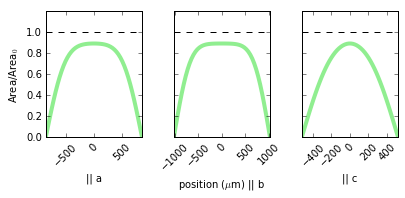

In [177]:
figure, axes, v, x, y = diffusion.diffusion3Dnpi(lengths_microns=[a, b, c], log10Ds_m2s=log10D, time_seconds=time_seconds)

diffusion3Dnpi() is a little more sophisticated than fast_vs_slow() in that you can change where it starts and ends

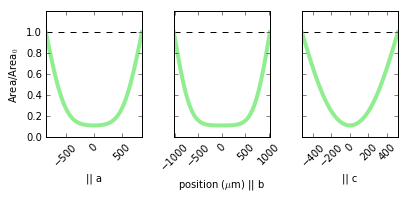

In [178]:
figure, axes, v, x, y = diffusion.diffusion3Dnpi(lengths_microns=[a, b, c], 
                                                 log10Ds_m2s=log10D, 
                                                 time_seconds=time_seconds,
                                                 initial=0., final=1.)

You can also un-center the x-axes if you prefer. If the figure gets cramped, you can expand the figure size.

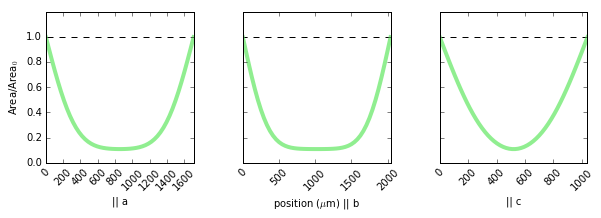

In [179]:
figure, axes, v, x, y = diffusion.diffusion3Dnpi(lengths_microns=[a, b, c], 
                                                 log10Ds_m2s=log10D, 
                                                 time_seconds=time_seconds,
                                                 initial=0., 
                                                 final=1., 
                                                 centered=False)
figure.set_size_inches(10, 3)

If you just want the concetration matrix but don't want to bother with the plot, you can return just the 3D matrix of concentration values and x and y values by setting plot3=False. 

In [180]:
v, x, y = diffusion.diffusion3Dnpi(lengths_microns=[a, b, c], 
                                   log10Ds_m2s=log10D, 
                                   time_seconds=time_seconds,
                                   initial=0., 
                                   final=1., 
                                   centered=False, 
                                   plot3=False)
print 'v is a concentration matrix of dimensions', np.shape(v)

v is a concentration matrix of dimensions (50L, 50L, 50L)


Make sure you delete the figure, axes variables from the start of the line if you do this, or else you will get an error because the number of things being returned (3) doesn't match the number of variables you're telling it there should be (5).

In [181]:
figure, axes, v, x, y = diffusion.diffusion3Dnpi(lengths_microns=[a, b, c], 
                                                 log10Ds_m2s=log10D, 
                                                 time_seconds=time_seconds,
                                                 initial=0., 
                                                 final=1., 
                                                 centered=False, 
                                                 plot3=False)

ValueError: need more than 3 values to unpack

By default, I divide the block by cutting it 50 ways in each direction. If you are worried about precision at the edges, you can use more divisions, but it will take longer.

In [ ]:
npoints = 100
v, x, y = diffusion.diffusion3Dnpi(lengths_microns=[a, b, c], 
                                   log10Ds_m2s=log10D, 
                                   time_seconds=time_seconds,
                                   initial=0., 
                                   final=1., 
                                   centered=False, 
                                   plot3=False, 
                                   points=npoints)
print 'v is the concentration matrix of dimensions', np.shape(v)
print 'The fractional concentration in the center of this block is', v[npoints/2, npoints/2, npoints/2]

## Let's make the same comparison for SD1

I copied the cell I used to setup SD7 above and then changed the sample, time, and temperature.

In [ ]:
sample = SD1
a = sample.twoA_list[0]
b = sample.twoB_list[0]
c = sample.twoC_list[0]
time_seconds = 5. * 3600.

reported_diffusivities_in_each_direction_in_m2s = [8e-13, 8e-13, 1.5e-11]
log10D = np.log10(reported_diffusivities_in_each_direction_in_m2s)

celsius = 1093.
print 'The reported log10 diffusivities in m2/s are', log10D
print 'The expected log10 PV diffusivities in m2/s are', dlib.KM98_slow.whatIsD(celsius=celsius)[0:3]
print 'The expected log10 PP diffusivities in m2/s are', dlib.KM98_fast.whatIsD(celsius=celsius)[0:3]

Why is this one so slow || [100]? It's slower even that is predicted by the PV mechanism. **I don't trust it.**

## Moving on to try to match the results for SD2 in Fig 9

Not quite done yet...

In [183]:
sample = SD2
a = sample.twoA_list[0]
b = sample.twoB_list[0]
c = sample.twoC_list[0]
time_seconds = 1. * 3600.

celsius = 905.
D_slow = dlib.KM98_slow.whatIsD(celsius=celsius)
D_fast = dlib.KM98_fast.whatIsD(celsius=celsius)